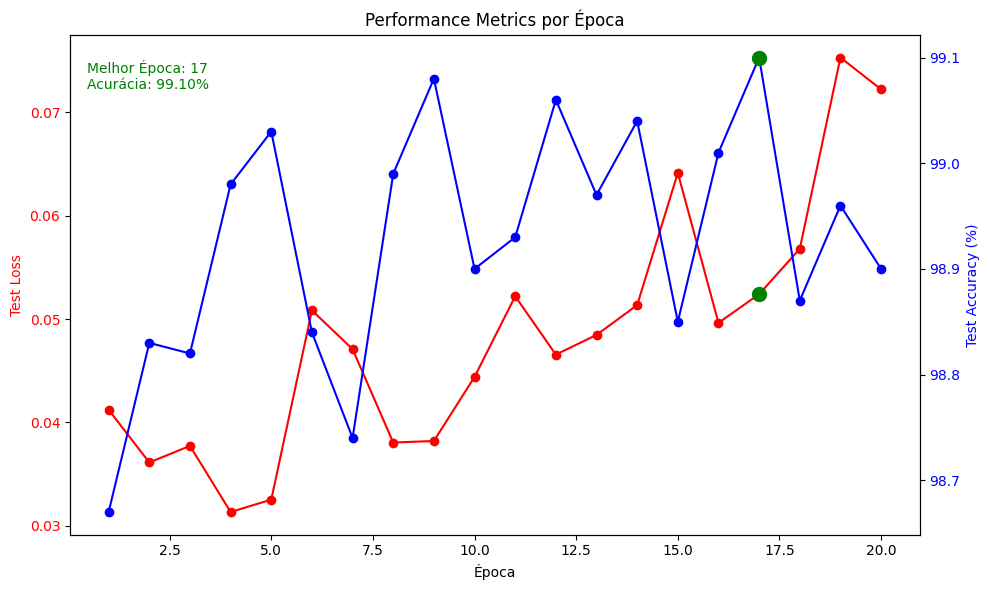

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Carrega os dados do CSV
metrics = pd.read_csv("results/metrics.csv")

# Determina a melhor época com base na acurácia
best_index = metrics['Test Accuracy'].idxmax()
best_epoch = metrics.loc[best_index, 'Epoch']
best_accuracy = metrics.loc[best_index, 'Test Accuracy']
best_loss = metrics.loc[best_index, 'Test Loss']

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot do Test Loss no eixo primário (esquerda)
ax1.plot(metrics["Epoch"], metrics["Test Loss"], color='red', marker='o', label="Test Loss")
ax1.set_xlabel("Época")
ax1.set_ylabel("Test Loss", color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Eixo secundário para Test Accuracy
ax2 = ax1.twinx()
ax2.plot(metrics["Epoch"], metrics["Test Accuracy"], color='blue', marker='o', label="Test Accuracy")
ax2.set_ylabel("Test Accuracy (%)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Marca a melhor época com um ponto destacado (nos dois eixos)
ax1.scatter(best_epoch, best_loss, color='green', s=100, zorder=5)
ax2.scatter(best_epoch, best_accuracy, color='green', s=100, zorder=5)

# Coloca a anotação em coordenadas relativas, por exemplo, no canto superior esquerdo do eixo secundário
ax2.text(
    0.02, 0.95,  # 2% a partir da esquerda e 95% a partir da base do eixo (dentro do eixo)
    f'Melhor Época: {int(best_epoch)}\nAcurácia: {best_accuracy:.2f}%',
    transform=ax2.transAxes,
    fontsize=10,
    color='green',
    verticalalignment='top',
    bbox=dict(facecolor='white', alpha=0.5, edgecolor='none')
)

plt.title("Performance Metrics por Época")
plt.tight_layout()
plt.show()


C:\Users\Matheus\AppData\Local\Temp\ipykernel_121464\3078282598.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("checkpoints/best_model

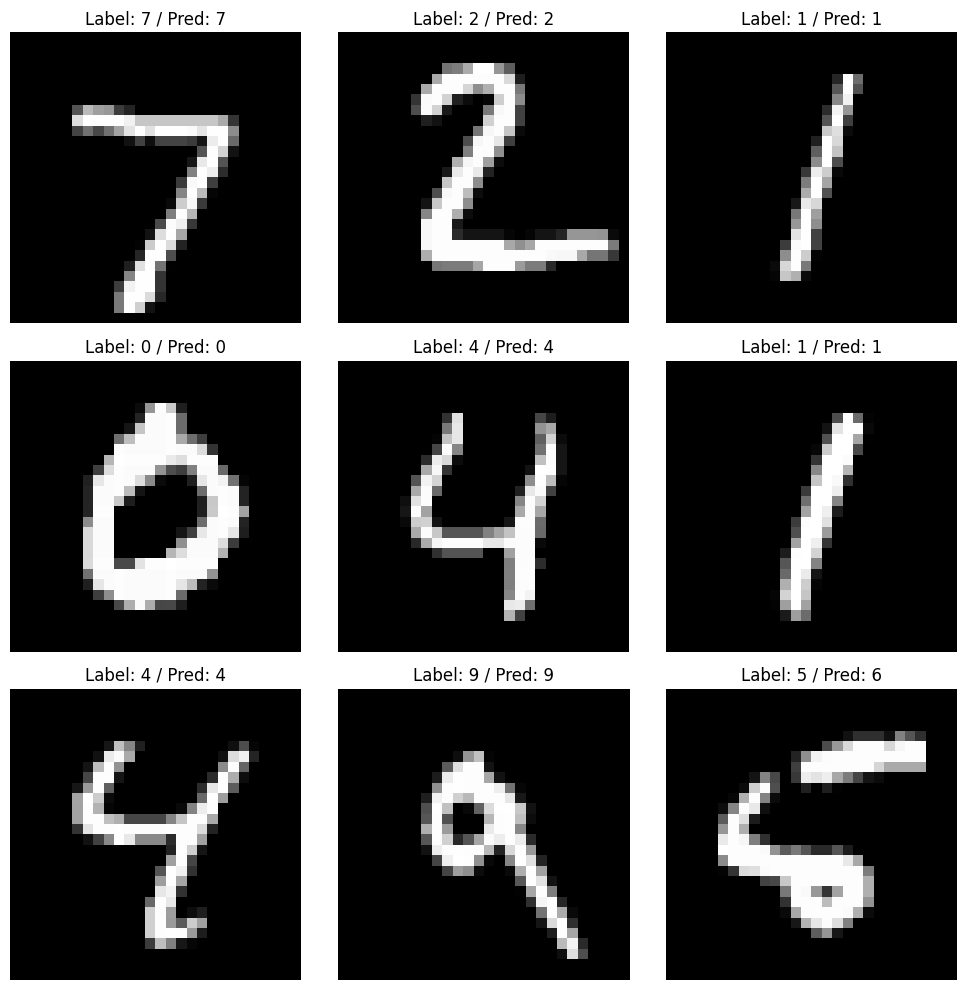

In [ ]:
import torch
import random
import matplotlib.pyplot as plt
from model import Net
from data_loader import get_data_loaders

# Configura o dispositivo (GPU se disponível, caso contrário CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Carrega modelo já treinado
model = Net().to(device)
model.load_state_dict(torch.load("checkpoints/best_model.pth", map_location=device))
model.eval()

# Carrega o test_loader (sem embaralhar, por padrão)
_, test_loader = get_data_loaders()

# Converte todos os batches do test_loader em uma lista
all_batches = list(test_loader)

# Escolhe aleatoriamente um batch
images, labels = random.choice(all_batches)
images, labels = images.to(device), labels.to(device)

# Faz as predições
with torch.no_grad():
    outputs = model(images)
    preds = outputs.argmax(dim=1, keepdim=True)

# Converte as imagens para CPU e numpy para exibição
images_np = images.cpu().numpy()

# Plota 9 imagens (3x3) com rótulos e predições
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.imshow(images_np[i].squeeze(), cmap="gray")
    ax.set_title(f"Label: {labels[i].item()} / Pred: {preds[i].item()}")
    ax.axis("off")

plt.tight_layout()
plt.show()
